## Ungraded Lab: MNIST Autoencoder

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/TensorFlow-Advanced_Techniques_Specialization/blob/master/Generative_Deep_Learning_with_TensorFlow/Week2/Labs/C4_W2_Lab_2_MNIST_Autoencoder.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Run in Google Colab</a>

You will now work on an autoencoder that works on the [MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist). This will encode the inputs to lower resolution images. The decoder should then be able to generate the original input from this compressed representation.

## Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import Model, layers, Input, optimizers
import numpy as np
import matplotlib.pyplot as plt

2024-09-12 15:22:19.663716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-12 15:22:19.676450: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-12 15:22:19.680576: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-12 15:22:19.688862: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Prepare the Dataset

You will load the MNIST data from TFDS into train and test sets. Let's first define a preprocessing function for normalizing and flattening the images. Since we'll be training an autoencoder, this will return `image, image` because the input will also be the target or label while training.


In [2]:
def map_image(image, label):
    '''Normalizes and flattens the image. Returns image as input and label.'''
    image = tf.cast(image, dtype=tf.float32)
    image = image / 255.0
    image = tf.reshape(image, shape=(784,))

    return image, image

In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

2024-09-12 15:22:21.935052: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Could not resolve hostname', error details: Could not resolve host: metadata.google.internal".


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /home/luis-mendoza/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


2024-09-12 15:22:25.894706: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 697 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


## Build the Model

You will now build a simple autoencoder to ingest the data. Like before, the encoder will compress the input and reconstructs it in the decoder output.

In [4]:
def simple_autoencoder(inputs):
    '''Builds the encoder and decoder using Dense layers.'''
    encoder = layers.Dense(units=32, activation='relu')(inputs)
    decoder = layers.Dense(units=784, activation='sigmoid')(encoder)

    return encoder, decoder

# Set the input shape
inputs = Input(shape=(784,))

# Get the encoder and decoder output
encoder_output, decoder_output = simple_autoencoder(inputs)

# Setup the encoder because you will visualize its output later
encoder_model = Model(inputs=inputs, outputs=encoder_output)

# Setup the autoencoder
autoencoder_model = Model(inputs=inputs, outputs=decoder_output)

## Compile the Model

You will setup the model for training. You can use binary crossentropy to measure the loss between pixel values that range from 0 (black) to 1 (white).

In [5]:
autoencoder_model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')

## Train the Model

In [6]:
train_steps = 60000 // BATCH_SIZE
simple_auto_history = autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50


I0000 00:00:1726176147.086041   71901 service.cc:146] XLA service 0x7bff7c0040f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726176147.086076   71901 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-09-12 15:22:27.101741: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-12 15:22:27.175468: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90201


 87/468 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5004

I0000 00:00:1726176147.828025   71901 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3178
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1508
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1234
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1098
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1024
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0983
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0962
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0952
Epoch 9/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0945
Epoch 10/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0942
Epoch 11/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0940
Epoch 12/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0938
Epoch 13/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0937
Epoch 14/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0936
Epoch 15/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0934


## Display sample results

You can now visualize the results. The utility functions below will help in plotting the encoded and decoded values.

In [7]:
def display_one_row(disp_images, offset, shape=(28, 28)):
    '''Display sample outputs in one row.'''
    for idx, test_image in enumerate(disp_images):
        plt.subplot(3, 10, offset + idx + 1)
        plt.xticks([])
        plt.yticks([])
        test_image = np.reshape(test_image, shape)
        plt.imshow(test_image, cmap='gray')

def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8, 4)):
    '''Displays the input, encoded, and decoded output values.'''
    plt.figure(figsize=(15, 5))
    display_one_row(disp_input_images, 0, shape=(28, 28,))
    display_one_row(disp_encoded, 10, shape=enc_shape)
    display_one_row(disp_predicted, 20, shape=(28, 28,))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


2024-09-12 15:22:55.283559: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-09-12 15:22:55.283970: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-09-12 15:22:55.311223: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.

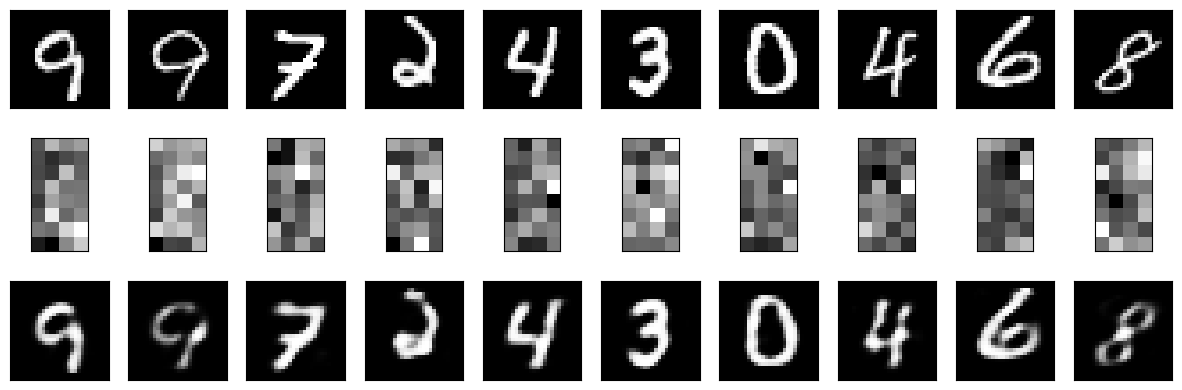

In [8]:
# Take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# Take the input images and put them in a list
output_samples = []

for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# Pick 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE, size=10)

# Get the encoder output
encoded_predicted = encoder_model.predict(test_dataset)

# Get a prediction for the test batch
simple_predicted = autoencoder_model.predict(test_dataset)

# Display the 10 samples, encodings and decoded values!
display_results(output_samples[idxs], encoded_predicted[idxs], simple_predicted[idxs])